## Ready to code? Let's begin

In [1]:
# Importing libraries we need
%matplotlib inline

#from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Create Linear Regression class.
To make it look cool, I am going to build a “Class” of Linear Regression,<br>
so we can use our code like we do with tensorflow/scikit-learn library 🙂

In [55]:
class LinearRegression(object):
    def __init__(self):
        self.m = None
        self.b = None
        self.loss_history = []
    def predict(self, X):
        y_pred = np.zeros(X.shape[0])
        y_pred = np.dot(X, self.m) + self.b
        return y_pred
    def loss(self, X, y):
        y_pred = self.predict(X)
        loss = sum(y - y_pred)/len(y)
        return loss
    def gradient(self, X, y):
        # This part is bit tricky to understand, 
        # try to understand matrix dot product!
        y_pred = self.predict(X)
        b_grad = sum((y_pred - y)) / len(y)
        m_grad = np.dot(X.T, (y_pred - y)) / len(y)
        return b_grad, m_grad
    def train(self, X, y, learning_rate=1e-3, num_iters=100, verbose=False):
        # set a default value of learning rate, and number of iteration
        [num_train, dim] = X.shape
        if self.m is None:
            self.m = 0.001 * np.random.randn(dim, 1)
        if self.b is None:
            self.b = 0.001 * np.random.randn(1)
        for it in range(num_iters):
            # store the loss for each iteration for plot 
            this_loss = self.loss(X, y)
            self.loss_history.append(this_loss)
            # calculates gradient and updates
            [b_gred, m_gred] = self.gradient(X, y)
            self.b -= learning_rate * b_gred
            self.m -= learning_rate * m_gred
            if verbose and it % 10 ==0:
                print('iteration %d / %d: loss %f' %(it, num_iters, this_loss))

## Create Sample Data for testing
Before we test our model with real data, it is always good idea to test it with sample code.

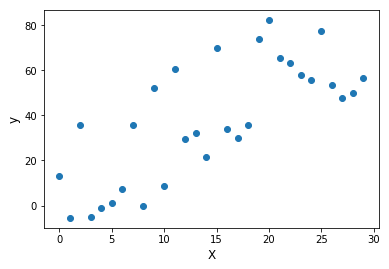

In [56]:
# We are expecting the result model with similar weight & bias with this
m = 2.5
b = 5
X = np.arange(30).reshape(30,1)
error = np.random.uniform(-30, 30, size=30).reshape(30,1)
y = (np.dot(m,X) + b) + error
# Let's check how our sample data look like
plt.scatter(X, y)
plt.xlabel('X', fontsize=12)
plt.ylabel('y', fontsize=12)

plt.show()

## Create Linear Regression model, and train model with data set.

In [57]:
model = LinearRegression()
model.train(X, y, num_iters= 100, verbose=True)

iteration 0 / 100: loss 37.954977
iteration 10 / 100: loss 2.723276
iteration 20 / 100: loss 1.504798
iteration 30 / 100: loss 1.459093
iteration 40 / 100: loss 1.453834
iteration 50 / 100: loss 1.449980
iteration 60 / 100: loss 1.446183
iteration 70 / 100: loss 1.442398
iteration 80 / 100: loss 1.438623
iteration 90 / 100: loss 1.434857


## Check the result!

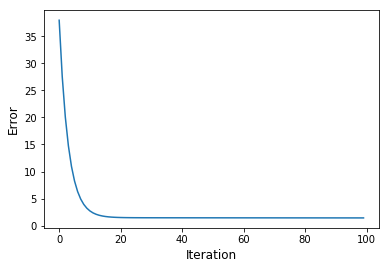

In [58]:
plt.plot(model.loss_history)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Error', fontsize=12)

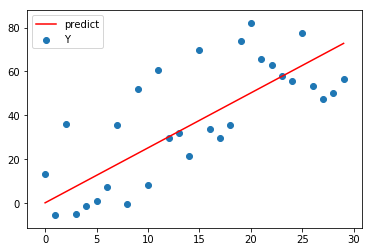

In [59]:
# Let's plot our prediction line
y_pred = np.dot(X, model.m) + model.b
plt.plot(X, y_pred, color='red', label='predict')
plt.scatter(X, y, label='Y')
plt.legend()
plt.show()